<a href="https://colab.research.google.com/github/syedamaann/LearningLog/blob/main/00_fundamentals/designpatterns/03_decoratorpatterns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# strategy pattern

quick revision:
- Take what varies in a system and encapsulate it.
- Libraries and frameworks often use design patterns in their implementations.
- Understanding design patterns helps in quickly understanding APIs structured around them.
- Design patterns don’t go directly into code but first into your mind; once you’ve learned them, apply them to new designs or rework old code when it becomes inflexible.
- The Strategy Pattern is used to implement various behaviors, such as duck behavior, encapsulating them into separate classes that can be expanded or changed, even at runtime.
- Think at the pattern level, not just at the object level.
- The Strategy Pattern defines a family of algorithms, encapsulates each one, and makes them interchangeable, allowing the algorithm to vary independently of the client using it.
- Pay attention to class relationships:
  - IS-A: Refers to inheritance (e.g., MallardDuck IS-A Duck).
  - HAS-A: Refers to composition (e.g., a duck HAS-A FlyBehavior and QuackBehavior).
  - IMPLEMENTS: Refers to the relationship between a class and an interface (e.g., FlyWithWings IMPLEMENTS FlyBehavior).
- It’s often better for a class to have behavior rather than inherit it—this is called composition.
- Encapsulating what varies reduces unintended consequences from code changes and increases flexibility.
- Separate code that changes frequently from code that remains stable; this improves maintainability and flexibility.
- Load your brain with design patterns so you can recognize when to apply them in your designs and existing applications.
- Use the Strategy Pattern when:
  - There are multiple variations of a behavior.
  - A behavior is likely to change frequently.
  - You want to avoid many conditional statements.
  - You need runtime behavior changes.
  - Code duplication exists across classes.
- Recognize the Strategy Pattern when:
  - Behaviors are encapsulated in separate classes.
  - There’s a context class that holds a reference to a behavior interface.
  - There are setter methods for changing behavior at runtime.
- Determine the need for the Strategy Pattern by asking:
  - Do I have multiple ways to accomplish the same task?
  - Am I using many conditional statements to select a behavior?
  - Do I need to change behavior without affecting class structure?

  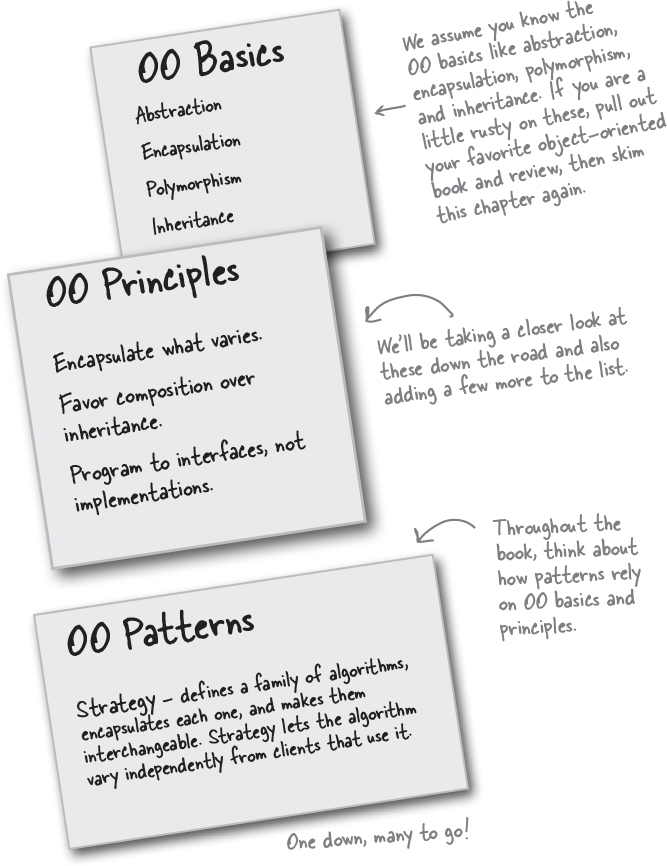

In [73]:
class Flytype:
  def fly(self):
    pass

class Quaktype:
  def quack(self):
    pass

class Duck:
  def __init__(self, flytype: Flytype, quaktype: Quaktype) -> None:
    self.flytype = flytype
    self.quaktype = quaktype

  def setflytype(self, flytype):
    self.flytype = flytype

  def setquaktype(self, quaktype):
    self.quaktype = quaktype

  def fly(self):
    self.flytype.fly()

  def quack(self):
    self.quaktype.quack()

class Flywithwings(Flytype):
  def fly(self):
    print("i can fly with wings")

class Nofly(Flytype):
  def fly(self):
    print("i can't fly")

class Quaksloud(Quaktype):
  def quack(self):
    print("i can quack loud")

class Quackquiet(Quaktype):
  def quack(self):
    print("i can quack quiet")

class Rocketpoweredflying(Flytype):
  def fly(self):
    print("i can fly with rocket power")

In [74]:
duck1 = Duck(Flywithwings(), Quaksloud())
duck2 = Duck(Nofly(), Quackquiet())
duck3 = Duck(Rocketpoweredflying(), Quaksloud())

In [75]:
print(duck1.fly(), duck1.quack())

i can fly with wings
i can quack loud
None None


In [76]:
print(duck2.fly(), duck2.quack())

i can't fly
i can quack quiet
None None


In [77]:
print(duck3.fly(), duck3.quack())

i can fly with rocket power
i can quack loud
None None


In [79]:
duck1.setflytype(Rocketpoweredflying())
duck1.setquaktype(Quackquiet())
print(duck1.fly(), duck1.quack())

i can fly with rocket power
i can quack quiet
None None


# observer pattern

quick revision:

- The **Observer Pattern** defines a **one-to-many relationship** between objects, meaning when one object (the Subject) changes state, all dependent objects (Observers) are notified and updated automatically.
- Observers are **loosely coupled** to the Subject, meaning the Subject only knows that they implement the Observer interface and nothing more about their internal workings.
- Loose coupling makes systems more **flexible** and easier to maintain, as changes in one part of the system don't heavily impact other parts.
- A **tightly coupled** system, on the other hand, is more fragile and harder to modify because objects are overly dependent on each other.
- The **WeatherData class** is an example of a Subject that holds state (e.g., temperature, humidity, pressure), and when these measurements change, it must notify all display elements (Observers).
- The Subject uses a **common interface** to notify Observers about changes, ensuring that updates are handled in a consistent way.
- **Push** vs. **Pull**: You can either push data from the Subject to Observers or have Observers pull data from the Subject. Pulling is considered more "correct" because it gives Observers more control over what they need.
- In the **push** approach, the Subject sends updated data directly to the Observers as arguments in the update call.
- In the **pull** approach, the Subject only notifies Observers that something has changed, and Observers call getter methods on the Subject to pull the data they need.
- **When to use the Observer Pattern**: It’s useful when you have objects that need to stay in sync with changes in another object, but you want to avoid tight coupling. It’s especially helpful if you expect changes in the system over time.
- **How to recognize the Observer Pattern**: Look for scenarios where one object (Subject) needs to notify multiple other objects (Observers) when its state changes, but without knowing the details of those Observers.
- **Common use cases**:
  - User interfaces where multiple elements need to update when data changes (e.g., a weather app with multiple displays).
  - Event handling systems where many listeners need to react to a single event (e.g., GUI button click).
  - Stock market apps where multiple clients observe changes in stock prices.
  - Social media platforms where users follow other users, and any status updates are broadcasted to all followers.
- The Observer Pattern is an example of **minimizing interdependencies** between objects, which makes designs more adaptable to future changes.
- The **one-to-many relationship** and **loose coupling** are key characteristics of the Observer Pattern, allowing for more flexible and maintainable code.
- The design principle behind the Observer Pattern helps ensure that systems can **scale** and **evolve** more easily because the Subject doesn’t need to know specifics about its Observers.

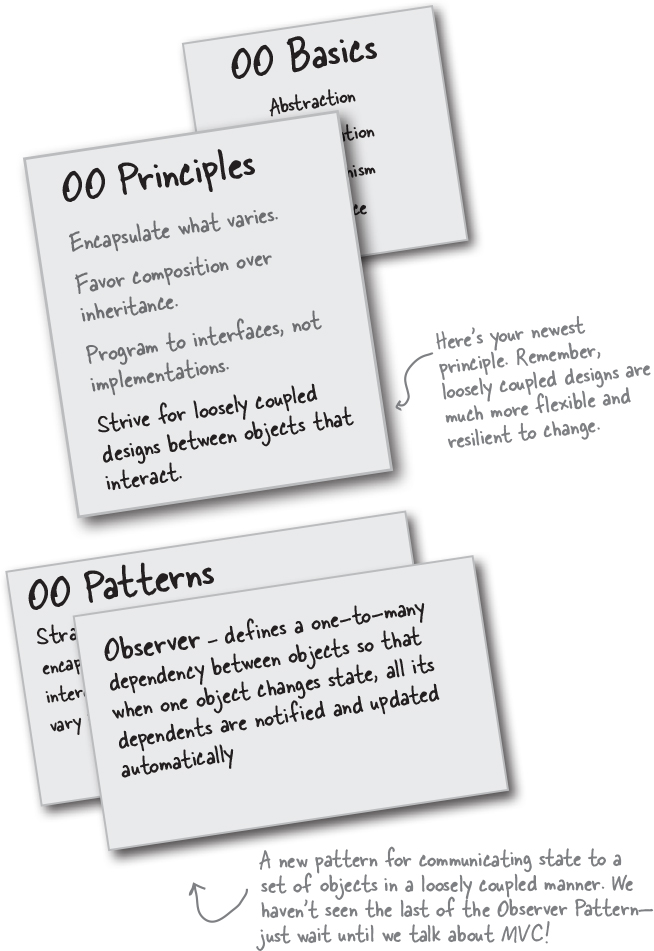

In [27]:
class WeatherData:
  def __init__(self):
    self.observers = []
    self.temperature = 0
    self.humidity = 0
    self.pressure = 0

  def registerObserver(self, observer):
    self.observers.append(observer)

  def removeObserver(self, observer):
    self.observers.remove(observer)

  def notifyObservers(self):
    for observer in self.observers:
      observer.update(self.temperature, self.humidity, self.pressure)

  def setMeasurements(self, temperature, humidity, pressure):
    self.temperature = temperature
    self.humidity = humidity
    self.pressure = pressure
    self.notifyObservers()

class Observer:
  def update(self, temperature, humidity, pressure):
    pass

class DisplayElement:
  def display(self):
    pass

class CurrentConditionsDisplay(Observer, DisplayElement):
  def __init__(self):
    self.temperature = 0
    self.humidity = 0
    self.pressure = 0

  def update(self, temperature, humidity, pressure):
    self.temperature = temperature
    self.humidity = humidity
    self.pressure = pressure
    self.display()

  def display(self):
    print("Current conditions:", self.temperature, "F degrees and", self.humidity, "% humidity")

class pressureDisplay(Observer, DisplayElement):
  def __init__(self):
    self.temperature = 0
    self.humidity = 0
    self.pressure = 0

  def update(self, temperature, humidity, pressure):
    self.temperature = temperature
    self.humidity = humidity
    self.pressure = pressure
    self.display()

  def display(self):
    print("Current pressure:", self.pressure)

class HeatindexDisplay(Observer, DisplayElement):
  def __init__(self):
    self.temperature = 0
    self.humidity = 0
    self.pressure = 0

  def update(self, temperature, humidity, pressure):
    self.temperature = temperature
    self.humidity = humidity
    self.pressure = pressure
    self.display()

  def display(self):
    heatindex = (16.923 + (0.185212 * self.temperature) + (5.37941 * self.humidity) - (0.100254 * self.temperature * self.humidity))
    print("Current heat index:", heatindex)


weatherdata = WeatherData()
conditiondisplay = CurrentConditionsDisplay()
pressuredisplay = pressureDisplay()
heatindexdisplay = HeatindexDisplay()
weatherdata.registerObserver(conditiondisplay)
weatherdata.registerObserver(pressuredisplay)
weatherdata.registerObserver(heatindexdisplay)
weatherdata.setMeasurements(80, 65, 30)

Current conditions: 80 F degrees and 65 % humidity
Current pressure: 30
Current heat index: -139.91918999999996


In [29]:
class WeatherDatapull:
  def __init__(self):
    self.observers = []
    self.temperature = 0
    self.humidity = 0
    self.pressure = 0
    self.windspeed = 0

  def registerObserver(self, observer):
    self.observers.append(observer)

  def removeObserver(self, observer):
    self.observers.remove(observer)

  def notifyObservers(self):
    for observer in self.observers:
      observer.update()

  def setMeasurements(self, temperature, humidity, pressure, windspeed):
    self.temperature = temperature
    self.humidity = humidity
    self.pressure = pressure
    self.windspeed = windspeed
    self.notifyObservers()

  def getTemperature(self):
    return self.temperature

  def getHumidity(self):
    return self.humidity

  def getPressure(self):
    return self.pressure

  def getWindspeed(self):
    return self.windspeed

class Observerpull:
  def update(self):
    pass

class DisplayElementpull:
  def display(self):
    pass

class TemperatureDisplaypull(Observerpull, DisplayElementpull):
  def __init__(self, weatherdata):
    self.weatherdata = weatherdata
    self.temperature = 0
    self.humidity = 0
    self.pressure = 0
    self.windspeed = 0

  def update(self):
    self.temperature = self.weatherdata.getTemperature()
    self.display()

  def display(self):
    print("Current temperature:", self.temperature, "F degrees")


class WindspeedDisplaypull(Observerpull, DisplayElementpull):
  def __init__(self, weatherdata):
    self.weatherdata = weatherdata
    self.temperature = 0
    self.humidity = 0
    self.pressure = 0
    self.windspeed = 0

  def update(self):
    self.windspeed = self.weatherdata.getWindspeed()
    self.display()

  def display(self):
    print("Current windspeed:", self.windspeed, "mph")


weatherdata = WeatherDatapull()
temperaturedisplay = TemperatureDisplaypull(weatherdata)
windspeeddisplay = WindspeedDisplaypull(weatherdata)
weatherdata.registerObserver(temperaturedisplay)
weatherdata.registerObserver(windspeeddisplay)
weatherdata.setMeasurements(80, 65, 30, 10)

Current temperature: 80 F degrees
Current windspeed: 10 mph


# decorator pattern

quick revision:

- The **Decorator Pattern** allows behavior to be added to an object dynamically, without modifying the original object's code.
- Decorators provide a **flexible alternative** to subclassing for extending functionality.
- **Objects can be decorated** at runtime, allowing new behaviors to be attached as needed.
- Multiple decorators can be used to **wrap an object** dynamically, adding layers of functionality.
- **Decorators share the same supertype** as the objects they decorate, ensuring type compatibility through inheritance or interface implementation.
- The **decorator adds behavior** before and/or after delegating the main task to the object it decorates.
- **Decorators act as wrappers**, dynamically adding responsibilities to an object.
- **Overuse of decorators** can result in many small objects and lead to a complex design, so be cautious when applying them.
- **Use decorators when** you need to extend or change behavior without modifying the underlying class.
- **Avoid decorators** when the concrete component’s type is critical, as decorators break code that relies on the concrete type.
- Decorators should be applied in systems where **behavior must change** frequently or where flexibility and extension are important.
- **Composition and delegation** are key concepts in the decorator pattern; they allow new behaviors to be added at runtime.
- **Inheritance is not always ideal** for flexibility—decorators are often a better choice for extending behavior.
- Be selective about where to apply decorators; unnecessary adherence to the **Open-Closed Principle** can make code overly complex.
- Designs should focus on being **easily extendable** to incorporate new behavior without modifying existing code.
- The goal of decorators is to create **flexible, resilient designs** that can adapt to changing requirements.

- **When to use the Decorator Pattern**:
  - When behavior needs to be added to individual objects without affecting other objects of the same class.
  - When subclassing would result in an explosion of classes to manage all combinations of behavior.
  - When you need to **dynamically combine behaviors** at runtime.

- **How to recognize where it's been used**:
  - Look for situations where objects are being "wrapped" with additional behaviors (logging, timing, etc.).
  - Check for the presence of multiple small classes that add functionality in layers, following the same interface or base class as the object they decorate.

- **Popular libraries/frameworks that use decorators**:
  - **Flask** and **Django**: Use decorators for routing and request handling.
  - **Python's built-in `functools.wraps`**: Helps preserve the original function's metadata when it's wrapped by a decorator.
  - **pytest**: Uses decorators to mark test functions for different behaviors (e.g., skipping tests, parameterizing tests).

- **Real-world scenario examples**:
  - **Logging**: Dynamically add logging to methods without modifying the original method.
  - **Security**: Apply security checks (e.g., checking user permissions) before allowing method execution.
  - **Data Validation**: Add data validation to functions that process user input.
  

  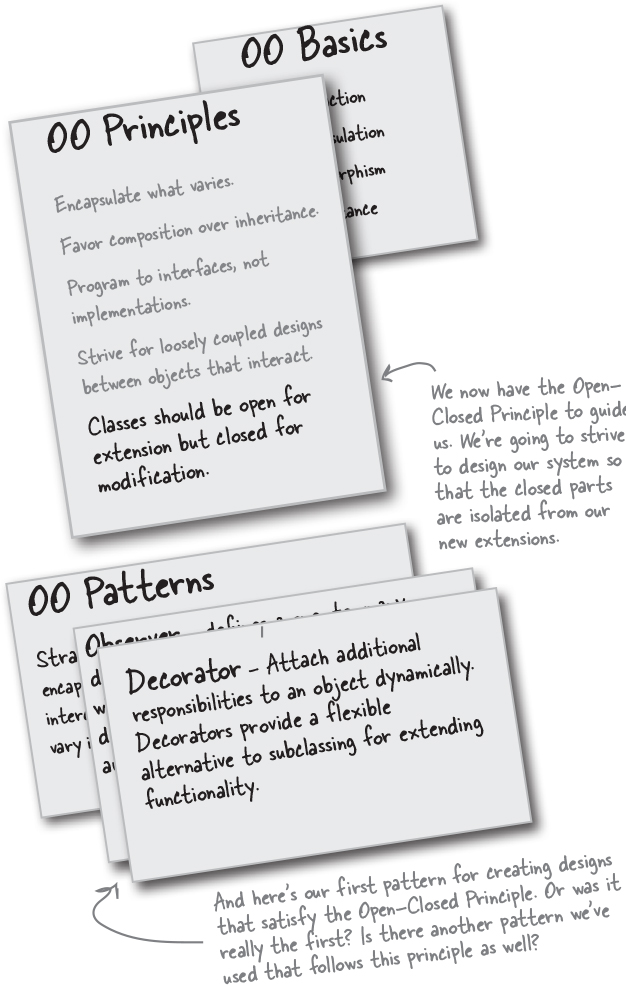
  


In [1]:
from abc import ABC, abstractmethod

class Beverage:
  def __init__(self):
    self.description = "Unknown Beverage"

  def getDescription(self):
    return self.description

  @abstractmethod
  def cost(self):
    pass

class Espresso(Beverage):
  def __init__(self):
    self.description = "Espresso"

  def cost(self):
    return 1.99

class HouseBlend(Beverage):
  def __init__(self):
    self.description = "House Blend Coffee"

  def cost(self):
    return 0.89

class DarkRoast(Beverage):
  def __init__(self):
    self.description = "Dark Roast Coffee"

  def cost(self):
    return 0.99

class CondimentDecorator(Beverage):
  def __init__(self, beverage):
    self.beverage = beverage

  def getDescription(self):
    return self.beverage.getDescription() + ", " + self.description

  @abstractmethod
  def cost(self):
    pass

class Mocha(CondimentDecorator):
  def __init__(self, beverage):
    self.description = "Mocha"
    super().__init__(beverage)

  def cost(self):
    return 0.20 + self.beverage.cost()

class Soy(CondimentDecorator):
  def __init__(self, beverage):
    self.description = "Soy"
    super().__init__(beverage)

  def cost(self):
    return 0.15 + self.beverage.cost()

class Whip(CondimentDecorator):
  def __init__(self, beverage):
    self.description = "Whip"
    super().__init__(beverage)

  def cost(self):
    return 0.1 + self.beverage.cost()

beverage1 = Espresso()
print(beverage1.getDescription(), beverage1.cost())
beverage2 = DarkRoast()
beverage2 = Mocha(beverage2)
beverage2 = Mocha(beverage2)
beverage2 = Whip(beverage2)
print(beverage2.getDescription(), beverage2.cost())

Espresso 1.99
Dark Roast Coffee, Mocha, Mocha, Whip 1.49
